In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
from sklearn import metrics
%matplotlib inline

In [90]:
data = pd.read_csv("./data/Median Values C1-88 50µM.csv")
data

,Unnamed: 0,Fish lenght[mm],eye area [mm²],yolk sac area [mm²],yolk sac breadth [mm]
0,control (fishwater)_C1-28,3.4440,0.044,0.195,0.4120
1,1% DMSO_C1-28,3.2990,0.043,0.176,0.4350
2,C1,0.0000,0.000,0.000,0.0000
3,C2,3.2654,0.038,0.131,0.3975
4,C3,3.1660,0.025,0.196,0.5120
...,...,...,...,...,...
89,C84,0.0000,0.000,0.000,0.0000
90,C85,0.0000,0.000,0.000,0.0000
91,C86,3.2620,0.046,0.209,0.4910
92,C87,0.0000,0.000,0.000,0.0000


In [91]:
data1 = data.set_index('Unnamed: 0')
data1

,Fish lenght[mm],eye area [mm²],yolk sac area [mm²],yolk sac breadth [mm]
Unnamed: 0,,,,
control (fishwater)_C1-28,3.4440,0.044,0.195,0.4120
1% DMSO_C1-28,3.2990,0.043,0.176,0.4350
C1,0.0000,0.000,0.000,0.0000
C2,3.2654,0.038,0.131,0.3975
C3,3.1660,0.025,0.196,0.5120
...,...,...,...,...
C84,0.0000,0.000,0.000,0.0000
C85,0.0000,0.000,0.000,0.0000
C86,3.2620,0.046,0.209,0.4910


In [92]:
#remove the name of index
data1.index.name = None

In [93]:
data1

,Fish lenght[mm],eye area [mm²],yolk sac area [mm²],yolk sac breadth [mm]
control (fishwater)_C1-28,3.4440,0.044,0.195,0.4120
1% DMSO_C1-28,3.2990,0.043,0.176,0.4350
C1,0.0000,0.000,0.000,0.0000
C2,3.2654,0.038,0.131,0.3975
C3,3.1660,0.025,0.196,0.5120
...,...,...,...,...
C84,0.0000,0.000,0.000,0.0000
C85,0.0000,0.000,0.000,0.0000
C86,3.2620,0.046,0.209,0.4910
C87,0.0000,0.000,0.000,0.0000


In [94]:
data1.to_csv('./data/data_all.csv')


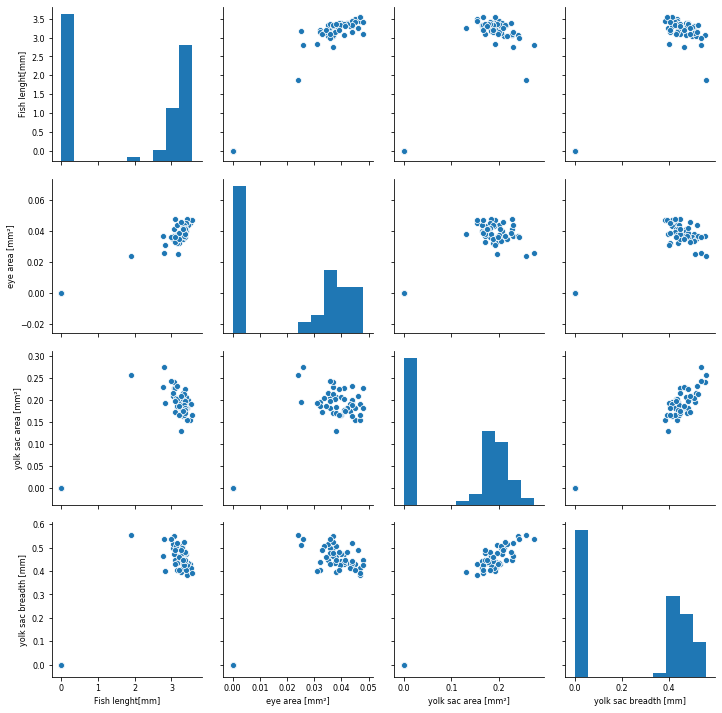

In [95]:
plt.rcParams['font.size'] = 8
sns.pairplot(data1)
#plt.savefig("./picture/pair_relationships_ratio.png", dpi=300)

# 1. Normalization

Remove zero value

In [96]:
data_0 = data1[data1["Fish lenght[mm]"]==0]
data_0

,Fish lenght[mm],eye area [mm²],yolk sac area [mm²],yolk sac breadth [mm]
C1,0.0,0.0,0.0,0.0
C4,0.0,0.0,0.0,0.0
C6,0.0,0.0,0.0,0.0
C15,0.0,0.0,0.0,0.0
C16,0.0,0.0,0.0,0.0
C19,0.0,0.0,0.0,0.0
C21,0.0,0.0,0.0,0.0
C25,0.0,0.0,0.0,0.0
C26,0.0,0.0,0.0,0.0
C29,0.0,0.0,0.0,0.0


In [97]:
data_0.to_csv("./data/0_values.csv")

In [98]:
data_rest = data1[data1["Fish lenght[mm]"]!=0]
data_rest

,Fish lenght[mm],eye area [mm²],yolk sac area [mm²],yolk sac breadth [mm]
control (fishwater)_C1-28,3.4440,0.0440,0.1950,0.4120
1% DMSO_C1-28,3.2990,0.0430,0.1760,0.4350
C2,3.2654,0.0380,0.1310,0.3975
C3,3.1660,0.0250,0.1960,0.5120
C5,3.5030,0.0450,0.1540,0.4320
C7,3.2535,0.0360,0.1810,0.4695
C8,3.3120,0.0440,0.1650,0.4140
C9,3.4350,0.0470,0.1540,0.3840
C10,3.1925,0.0320,0.1950,0.4405
C11,3.3850,0.0420,0.1810,0.4350


In [99]:
data_rest.to_csv("./data/data_rest.csv")

In [100]:
#eye area ratio = eye area [mm²]/Fish lenght[mm]
#yolk sac area ratio = yolk sac area [mm²]/Fish lenght[mm]
#yolk sac breadth ratio =yolk sac breadth [mm]/Fish lenght[mm]

data_rest["eye area ratio"] = data_rest[["Fish lenght[mm]", "eye area [mm²]"]].apply(lambda x:x["eye area [mm²]"]/x["Fish lenght[mm]"],axis=1)
data_rest["yolk sac area ratio"] = data_rest[["Fish lenght[mm]", "yolk sac area [mm²]"]].apply(lambda x:x["yolk sac area [mm²]"]/x["Fish lenght[mm]"],axis=1)
data_rest["yolk sac breadth ratio"] = data_rest[["Fish lenght[mm]", "yolk sac breadth [mm]"]].apply(lambda x:x["yolk sac breadth [mm]"]/x["Fish lenght[mm]"],axis=1)

data_rest

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,Fish lenght[mm],eye area [mm²],yolk sac area [mm²],yolk sac breadth [mm],eye area ratio,yolk sac area ratio,yolk sac breadth ratio
control (fishwater)_C1-28,3.4440,0.0440,0.1950,0.4120,0.012776,0.056620,0.119628
1% DMSO_C1-28,3.2990,0.0430,0.1760,0.4350,0.013034,0.053349,0.131858
C2,3.2654,0.0380,0.1310,0.3975,0.011637,0.040118,0.121731
C3,3.1660,0.0250,0.1960,0.5120,0.007896,0.061908,0.161718
C5,3.5030,0.0450,0.1540,0.4320,0.012846,0.043962,0.123323
C7,3.2535,0.0360,0.1810,0.4695,0.011065,0.055632,0.144306
C8,3.3120,0.0440,0.1650,0.4140,0.013285,0.049819,0.125000
C9,3.4350,0.0470,0.1540,0.3840,0.013683,0.044833,0.111790
C10,3.1925,0.0320,0.1950,0.4405,0.010023,0.061081,0.137980
C11,3.3850,0.0420,0.1810,0.4350,0.012408,0.053471,0.128508


In [101]:
data_rest.to_csv("./data/data_with_ratio.csv")

In [102]:
data_ratio = data_rest[["Fish lenght[mm]", "eye area ratio", "yolk sac area ratio", "yolk sac breadth ratio"]]
data_ratio

,Fish lenght[mm],eye area ratio,yolk sac area ratio,yolk sac breadth ratio
control (fishwater)_C1-28,3.4440,0.012776,0.056620,0.119628
1% DMSO_C1-28,3.2990,0.013034,0.053349,0.131858
C2,3.2654,0.011637,0.040118,0.121731
C3,3.1660,0.007896,0.061908,0.161718
C5,3.5030,0.012846,0.043962,0.123323
C7,3.2535,0.011065,0.055632,0.144306
C8,3.3120,0.013285,0.049819,0.125000
C9,3.4350,0.013683,0.044833,0.111790
C10,3.1925,0.010023,0.061081,0.137980
C11,3.3850,0.012408,0.053471,0.128508


In [103]:
data_ratio.to_csv("./data/data_ratio.csv")

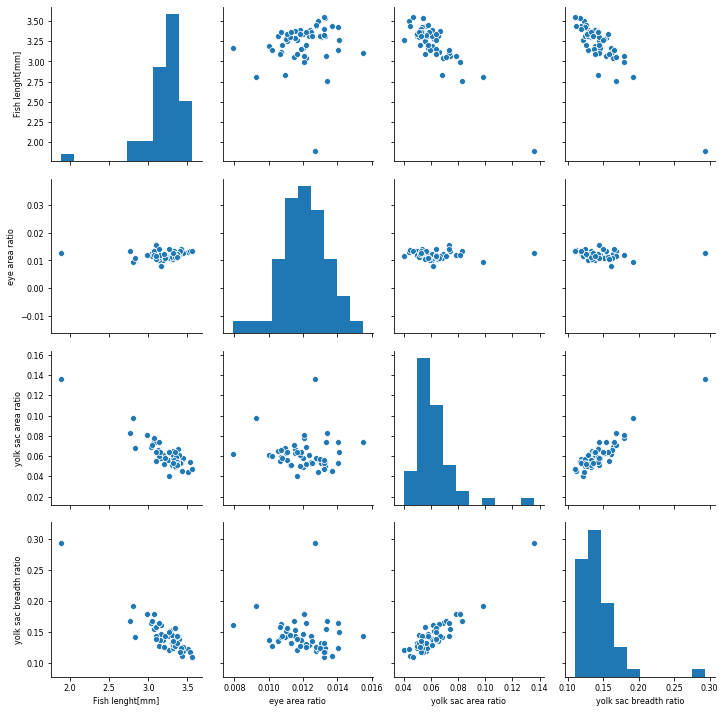

In [104]:
plt.rcParams['font.size'] = 8
sns.pairplot(data_ratio)
plt.savefig("./picture/pair_relationships_ratio.png", dpi=300)

**Silhouette Coefficient**

In [105]:
#try 2 clusters to 10 clusters and evaluate the scores.
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(data_ratio).labels_
    score = metrics.silhouette_score(data_ratio, labels)
    scores.append(score)
    
scores

[0.7208274324556417,
 0.5978479901859994,
 0.6218205817840937,
 0.5753129349340603,
 0.5324687333969772,
 0.5126111646875844,
 0.49417324405790336,
 0.46257198833603336,
 0.46878435233731747,
 0.45717568959467036,
 0.46466279249534986,
 0.4435948428120442,
 0.4161139285449365,
 0.3991190567813931,
 0.40863264958617024,
 0.381811552015661,
 0.37746430503388606,
 0.34905814309207633]

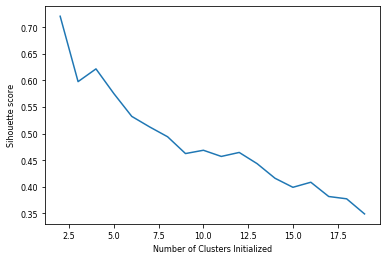

In [106]:
plt.plot(list(range(2,20)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette score")
plt.savefig("./picture/Sihouette_score.png", dpi=300)

## The number of clusters is 2

In [107]:
kmeans2 = KMeans(n_clusters=2).fit(data_ratio)
data_ratio["clusters2"] = kmeans2.labels_

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [108]:
data_ratio.sort_values("clusters2").to_csv("./data/ratio_2clusters_sort.csv")
data_ratio.to_csv("./data/ratio_2clusters.csv")
data_ratio.sort_values("clusters2")

,Fish lenght[mm],eye area ratio,yolk sac area ratio,yolk sac breadth ratio,clusters2
control (fishwater)_C1-28,3.4440,0.012776,0.056620,0.119628,0
C44,3.3750,0.011556,0.066963,0.143111,0
C46,3.3210,0.012346,0.061126,0.128877,0
C51,3.3590,0.010717,0.058648,0.142602,0
C52,3.4070,0.013208,0.053126,0.118433,0
C55,3.3320,0.013205,0.056423,0.132353,0
control (fishwater)_C59-88,3.2980,0.011219,0.051546,0.144633,0
1% DMSO_C59-88,3.3655,0.012480,0.053781,0.143515,0
C60,3.3365,0.011989,0.049603,0.132324,0
C61,3.0520,0.011468,0.071101,0.168414,0


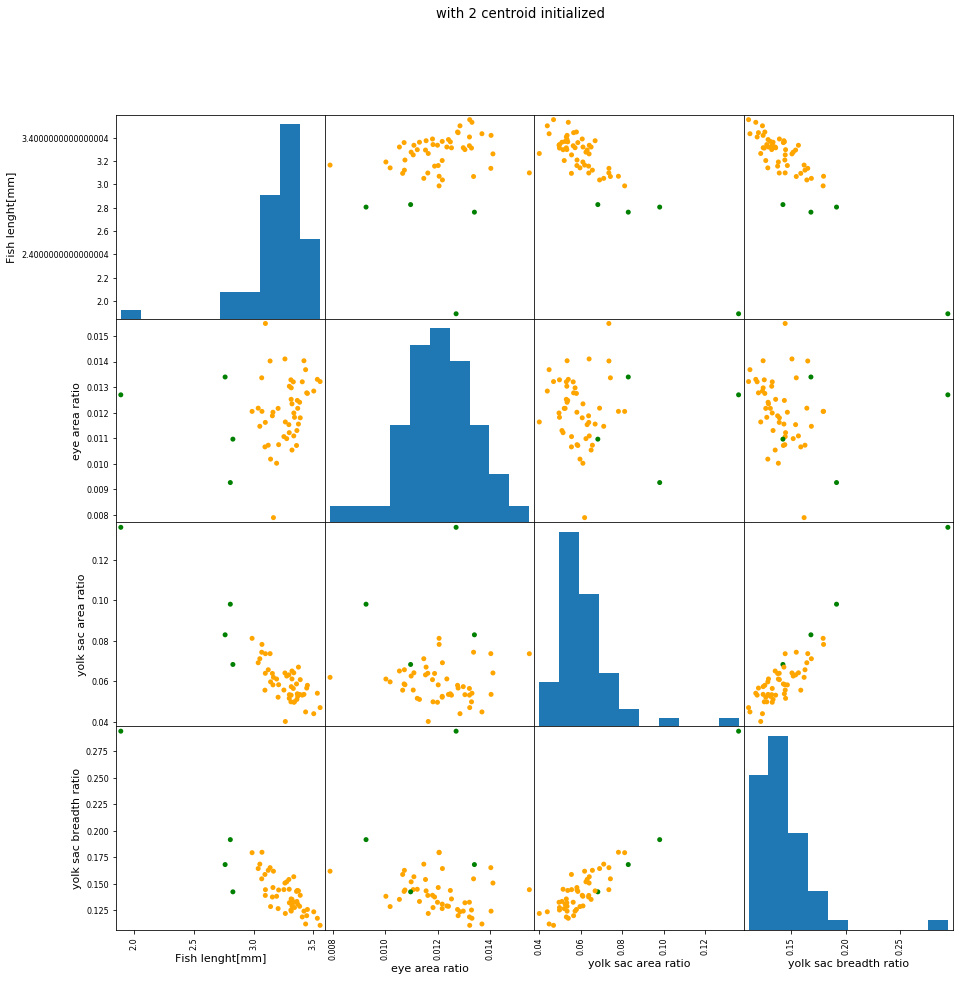

In [109]:
plt.rcParams['font.size'] = 11
colors = np.array(['orange', 'green', 'red', 'blue', 'yellow', 'black'])
scatter_matrix(data_ratio[["Fish lenght[mm]", "eye area ratio", "yolk sac area ratio", "yolk sac breadth ratio"]],s=100, alpha=1, c=colors[data_ratio["clusters2"]], figsize=(15,15))
plt.suptitle("with 2 centroid initialized")
plt.savefig("./picture/KMeans_with_2_clusters.png", dpi=300)

## The number of clusters is 3

In [110]:
kmeans3 = KMeans(n_clusters=3).fit(data_ratio)

In [111]:
data_ratio["clusters3"] = kmeans3.labels_

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


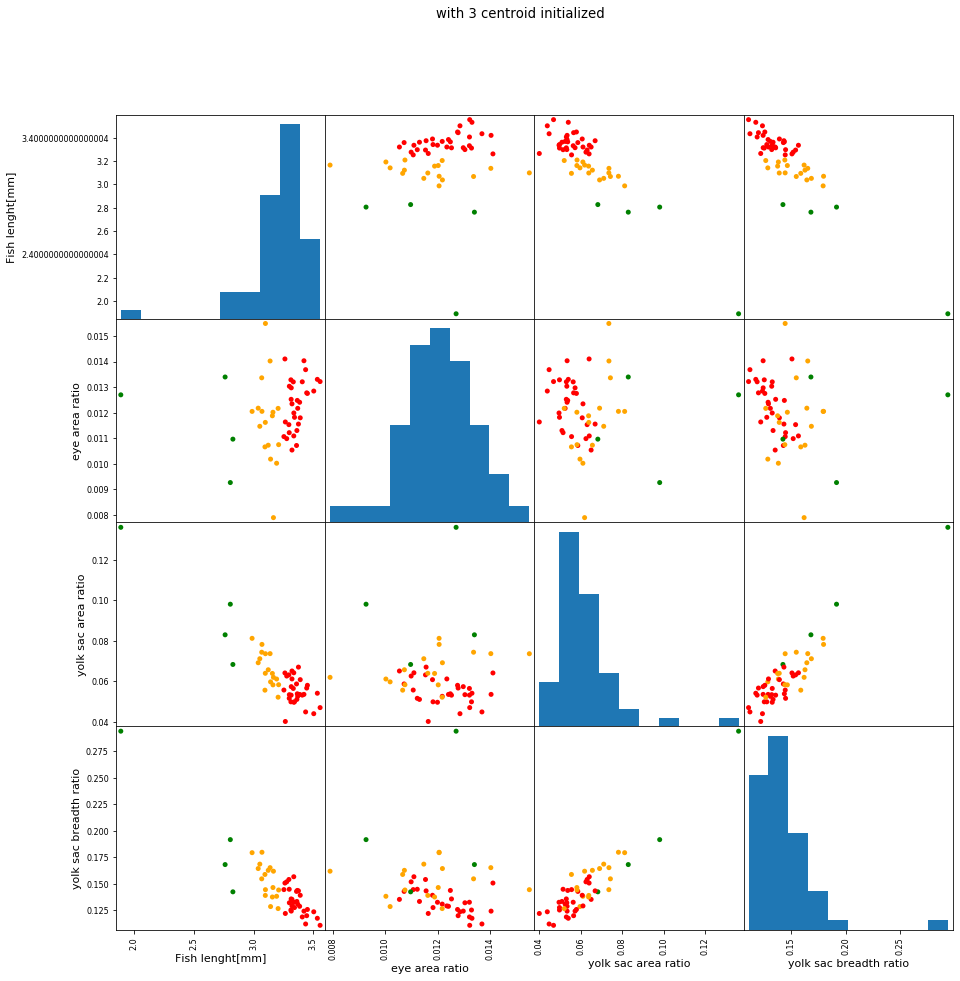

In [112]:
plt.rcParams['font.size'] = 11
colors = np.array(['orange', 'green', 'red', 'blue', 'yellow', 'black'])
scatter_matrix(data_ratio[["Fish lenght[mm]", "eye area ratio", "yolk sac area ratio", "yolk sac breadth ratio"]],s=100, alpha=1, c=colors[data_ratio["clusters3"]], figsize=(15,15))
plt.suptitle("with 3 centroid initialized")
plt.savefig("./picture/KMeans_with_3_clusters.png", dpi=300)

In [113]:
data_ratio.sort_values("clusters3").to_csv("./data/ratio_3clusters_sort.csv")
data_ratio.to_csv("./data/ratio_3clusters.csv")
data_ratio.sort_values("clusters3")

,Fish lenght[mm],eye area ratio,yolk sac area ratio,yolk sac breadth ratio,clusters2,clusters3
C71,3.0950,0.010662,0.055574,0.158643,0,0
C28,3.0990,0.015489,0.073572,0.144240,0,0
C65,3.0700,0.012052,0.078176,0.179642,0,0
C64,3.1225,0.010729,0.065653,0.162530,0,0
C70,3.1570,0.011878,0.063826,0.137314,0,0
C14,3.1420,0.010185,0.059675,0.128262,0,0
C13,3.1620,0.012018,0.058191,0.146268,0,0
C12,3.0385,0.012177,0.069113,0.164226,0,0
C24,3.0680,0.013364,0.074316,0.154498,0,0
C72,3.1380,0.014022,0.073614,0.165073,0,0


## The number of clusters is 4

In [114]:
kmeans4 = KMeans(n_clusters=4).fit(data_ratio)

In [115]:
data_ratio["clusters4"] = kmeans4.labels_

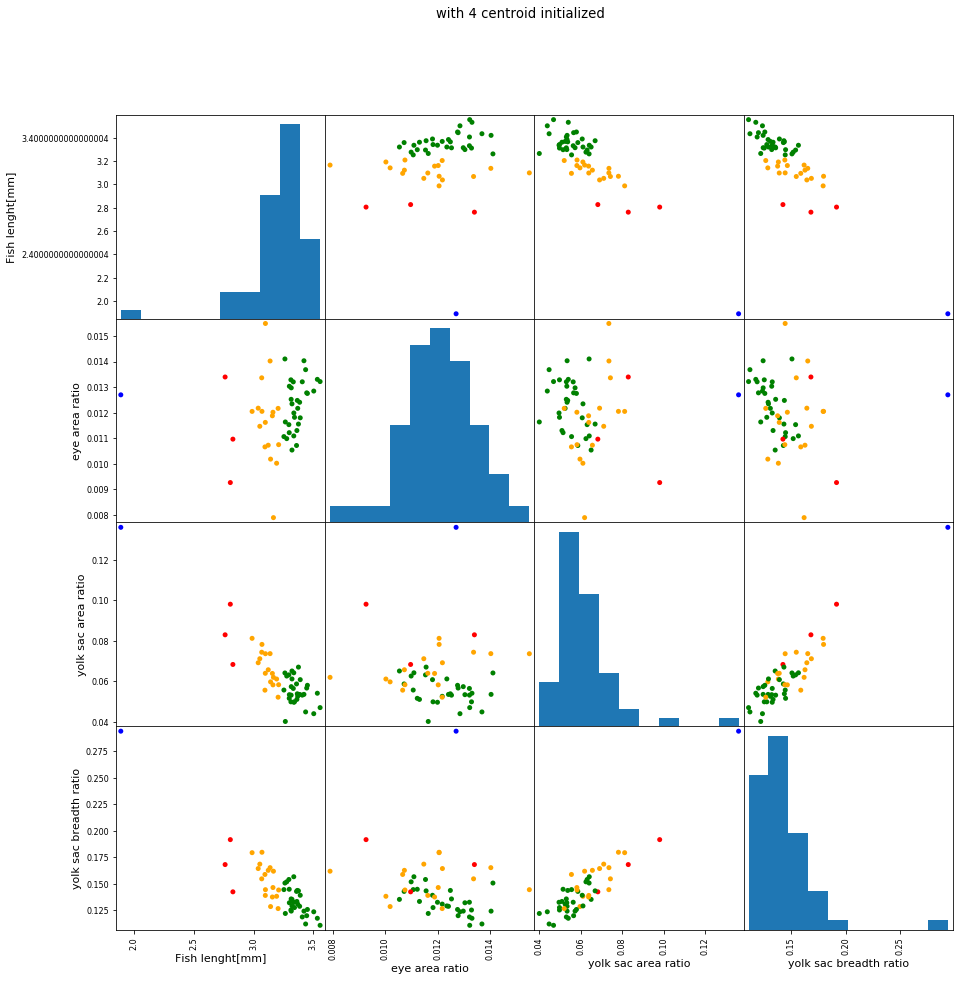

In [116]:
plt.rcParams['font.size'] = 11
colors = np.array(['orange', 'green', 'red', 'blue', 'yellow', 'black'])
scatter_matrix(data_ratio[["Fish lenght[mm]", "eye area ratio", "yolk sac area ratio", "yolk sac breadth ratio"]],s=100, alpha=1, c=colors[data_ratio["clusters4"]], figsize=(15,15))
plt.suptitle("with 4 centroid initialized")
plt.savefig("./picture/KMeans_with_4_clusters.png", dpi=300)

In [117]:
data_ratio.sort_values("clusters4").to_csv("./data/ratio_4clusters_sort.csv")
data_ratio.to_csv("./data/ratio_4clusters.csv")
data_ratio.sort_values("clusters4")

,Fish lenght[mm],eye area ratio,yolk sac area ratio,yolk sac breadth ratio,clusters2,clusters3,clusters4
C12,3.0385,0.012177,0.069113,0.164226,0,0,0
C24,3.0680,0.013364,0.074316,0.154498,0,0,0
C64,3.1225,0.010729,0.065653,0.162530,0,0,0
C65,3.0700,0.012052,0.078176,0.179642,0,0,0
C70,3.1570,0.011878,0.063826,0.137314,0,0,0
C14,3.1420,0.010185,0.059675,0.128262,0,0,0
C13,3.1620,0.012018,0.058191,0.146268,0,0,0
C28,3.0990,0.015489,0.073572,0.144240,0,0,0
C71,3.0950,0.010662,0.055574,0.158643,0,0,0
C61,3.0520,0.011468,0.071101,0.168414,0,0,0


# KMeans with PCA

In [118]:
 from sklearn.decomposition import PCA

In [119]:
data_pca = pd.read_csv("./data/data_ratio.csv")

In [120]:
data = data_pca.set_index("Unnamed: 0")

In [121]:
data.index.name = None

In [122]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-0.223747,0.000340
1,-0.078608,0.006070
2,-0.046874,0.023945
3,0.056925,-0.010191
4,-0.282687,-0.004843
5,-0.032059,-0.001319
6,-0.092376,0.012286
7,-0.216170,0.012907
8,0.028243,0.009159
9,-0.164406,-0.000267


## PCA: The number of clusters is 2

In [123]:
pca_kmeans2 = KMeans(n_clusters=2).fit(principalDf)

In [124]:
principalDf['pca_clusters2'] = pca_kmeans2.labels_
principalDf

,principal component 1,principal component 2,pca_clusters2
0,-0.223747,0.000340,1
1,-0.078608,0.006070,1
2,-0.046874,0.023945,1
3,0.056925,-0.010191,1
4,-0.282687,-0.004843,1
5,-0.032059,-0.001319,1
6,-0.092376,0.012286,1
7,-0.216170,0.012907,1
8,0.028243,0.009159,1
9,-0.164406,-0.000267,1


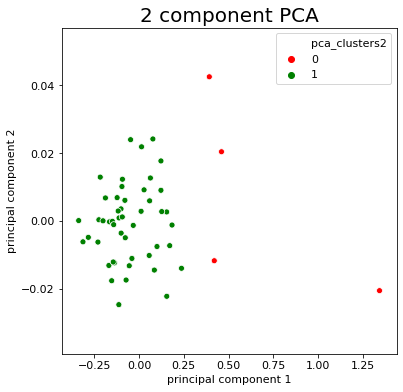

In [125]:
x_axis = principalDf['principal component 1']
y_axis = principalDf['principal component 2']
fig = plt.figure(figsize = (6,6))
sns.scatterplot(x_axis, y_axis, hue = principalDf['pca_clusters2'], palette = ['red', 'green'])
plt.title('2 component PCA', fontsize = 20)
plt.savefig("./picture/pca_2clusters.png", dpi=300)
plt.show()

In [126]:
#pca2_data = pd.concat([data, principalDf], axis=1)
# pca2_data = pca6_data.drop(columns = ["clusters2", "clusters6"], axis=1)
#pca2_data

## PCA: The number of clusters is 3

In [127]:
pca_kmeans3 = KMeans(n_clusters=3).fit(principalDf)

In [128]:
principalDf['pca_clusters3'] = pca_kmeans3.labels_

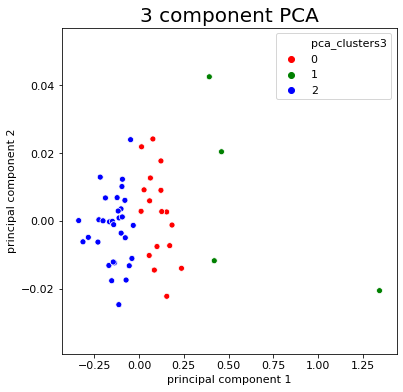

In [129]:
x_axis = principalDf['principal component 1']
y_axis = principalDf['principal component 2']
fig = plt.figure(figsize = (6,6))
sns.scatterplot(x_axis, y_axis, hue = principalDf['pca_clusters3'], palette = ['red', 'green', 'blue'])
plt.title('3 component PCA', fontsize = 20)
plt.savefig("./picture/pca_3clusters.png", dpi=300)
plt.show()

## PCA: The number of clusters is 4

In [130]:
pca_kmeans4 = KMeans(n_clusters=4).fit(principalDf)

In [131]:
principalDf['pca_clusters4'] = pca_kmeans4.labels_

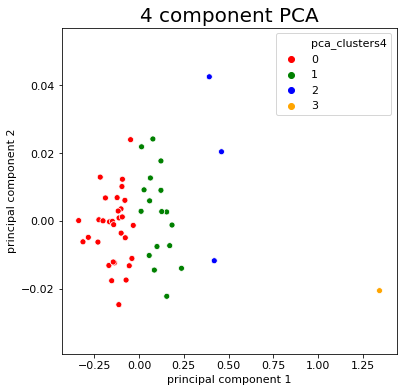

In [132]:
x_axis = principalDf['principal component 1']
y_axis = principalDf['principal component 2']
fig = plt.figure(figsize = (6,6))
sns.scatterplot(x_axis, y_axis, hue = principalDf['pca_clusters4'], palette = ['red', 'green', 'blue','orange'])
plt.title('4 component PCA', fontsize = 20)
plt.savefig("./picture/pca_4clusters.png", dpi=300)
plt.show()